In [943]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')


In [944]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [945]:
df.shape

(346, 10)

# changing to date time object

In [946]:
# changing both, effective date and due date' format.
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and Pre-processing

In [947]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [948]:
### 260 out of 346 have been paid off with 86 sent into correction.

## Lets plot some columns to better understand out data

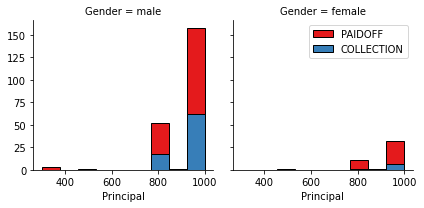

In [949]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### Men seem to have higher rate of default compared to women.

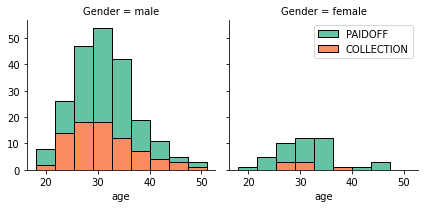

In [950]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

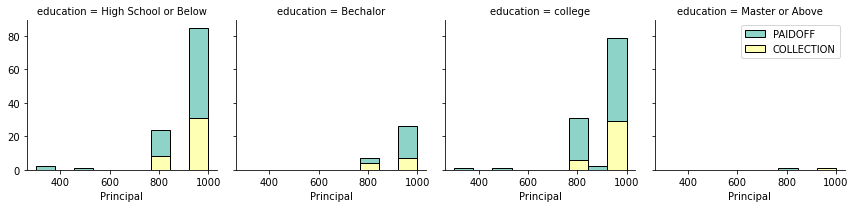

In [951]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="education", hue="loan_status", palette="Set3", col_wrap=4)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### lets look at relationship between day of week (effective date)  and loan status

In [952]:
df['day_of_week_applied'] = df['effective_date'].dt.dayofweek
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_week_applied
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4


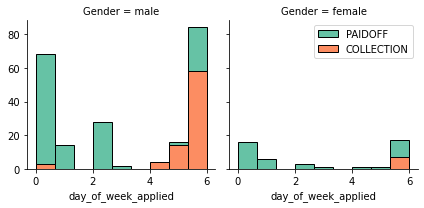

In [953]:
bins = np.linspace(df.day_of_week_applied.min(), df.day_of_week_applied.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'day_of_week_applied', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### It seems that when the effective date of loan is during the weekends, the loans tend to go into collection at a higher rate compared to weekdays

In [954]:
df['day_of_week_duedate'] = df['due_date'].dt.dayofweek
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_week_applied,day_of_week_duedate
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,4
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,4
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,5
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,5


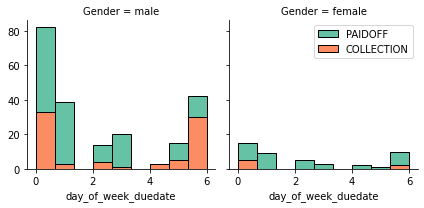

In [955]:
bins = np.linspace(df.day_of_week_duedate.min(), df.day_of_week_duedate.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'day_of_week_duedate', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### the rate of default seems high on Monday and Sunday (day 0 and 6) as per their due dates.

# Pre-Processing and Extraction

#### lets create 2 new columns in our dataframe to help us better analyze the impact of days_of_week on defaults

In [956]:
df['applied_weekend'] = df['day_of_week_applied'].apply(lambda x: 1 if (x > 3) else 0)
df['due_on_0_6_day'] = df["day_of_week_duedate"].apply(lambda x: 1 if (x == 0 or x == 6) else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_week_applied,day_of_week_duedate,applied_weekend,due_on_0_6_day
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,4,0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,4,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,3,0,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,5,1,0
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,5,1,0


In [957]:
#converting categorical data into numerical date (Gender)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_week_applied,day_of_week_duedate,applied_weekend,due_on_0_6_day
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,4,0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,4,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,3,0,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,5,1,0
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,5,1,0


In [958]:
Feature = df[['Principal','terms','age','Gender','applied_weekend','due_on_0_6_day','loan_status']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)


Feature.head()



,Principal,terms,age,Gender,applied_weekend,due_on_0_6_day,loan_status,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,PAIDOFF,0,1,0,0
1,1000,30,33,1,0,0,PAIDOFF,1,0,0,0
2,1000,15,27,0,0,0,PAIDOFF,0,0,0,1
3,1000,30,28,1,1,0,PAIDOFF,0,0,0,1
4,1000,30,29,0,1,0,PAIDOFF,0,0,0,1


In [959]:
#lets create a new column 'loan_status_01'to store numerical data about loan status and drop the original categorical column from Feature
Feature['loan_status_01'] = Feature['loan_status'].apply(lambda x:1 if (x == "PAIDOFF") else 0)
Feature.drop(['loan_status'], axis =1, inplace = True)
Feature.head()


,Principal,terms,age,Gender,applied_weekend,due_on_0_6_day,Bechalor,High School or Below,Master or Above,college,loan_status_01
0,1000,30,45,0,0,0,0,1,0,0,1
1,1000,30,33,1,0,0,1,0,0,0,1
2,1000,15,27,0,0,0,0,0,0,1,1
3,1000,30,28,1,1,0,0,0,0,1,1
4,1000,30,29,0,1,0,0,0,0,1,1


In [960]:
targetx = Feature[['loan_status_01']].values
targetx[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [961]:
Feature.drop(['loan_status_01'], axis = 1, inplace =True)
Feature.head()

,Principal,terms,age,Gender,applied_weekend,due_on_0_6_day,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,0,1,0,0
1,1000,30,33,1,0,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,0,1
4,1000,30,29,0,1,0,0,0,0,1


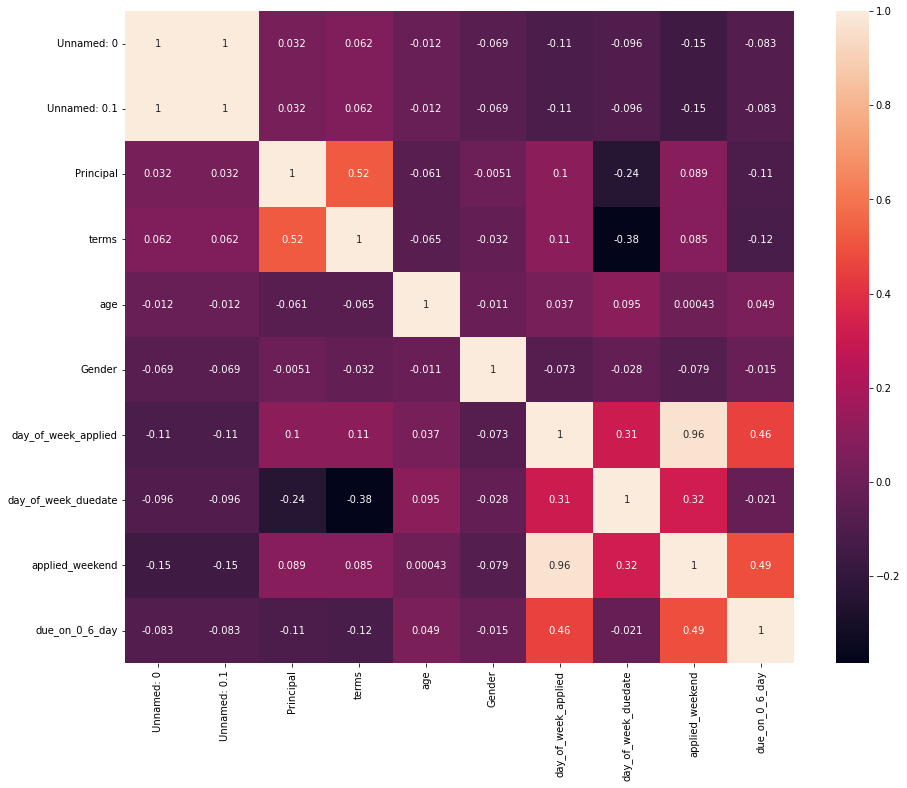

In [962]:
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### lets define our feature sets, X  and target Y:

In [963]:
#getting a Numpy representation of the DF Feature
X = Feature.values
X[0:5]

array([[1000,   30,   45,    0,    0,    0,    0,    1,    0,    0],
       [1000,   30,   33,    1,    0,    0,    1,    0,    0,    0],
       [1000,   15,   27,    0,    0,    0,    0,    0,    0,    1],
       [1000,   30,   28,    1,    1,    0,    0,    0,    0,    1],
       [1000,   30,   29,    0,    1,    0,    0,    0,    0,    1]])

In [964]:
y = targetx
y[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

# Normalization of data

#### Since we have different CSV files for training and testing, we will not split the data, and use the entire 'loan_train.csv' for training models.

In [965]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -1.31316772, -0.38170062,  1.13639374, -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
        -1.31316772,  2.61985426, -0.87997669, -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -1.31316772, -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -1.31316772, -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -1.31316772, -0.38170062, -0.87997669, -0.07624929,  1.14984679]])

In [966]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (276, 10) (276, 1)
Test set: (70, 10) (70, 1)


# Classification
Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:

K Nearest Neighbor(KNN)
Decision Tree
Support Vector Machine
Logistic Regression
__ Notice:__

You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.\ warning: You should not use the loan_test.csv for finding the best k, however, you can split your train_loan.csv into train and test to find the best k.

In [967]:
#training
from sklearn.neighbors import KNeighborsClassifier

k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train.ravel())


In [968]:
#predicitng (with k being 3)
knn_result = neigh.predict(X_test)
knn_result[0:5]
#y[0:5]

array([1, 1, 1, 1, 1])

In [969]:
y_test[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [970]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, knn_result))

Train set Accuracy:  0.8659420289855072
Test set Accuracy:  0.7142857142857143


[0.7        0.62857143 0.71428571 0.68571429 0.72857143 0.71428571
 0.7        0.64285714 0.65714286 0.64285714 0.68571429 0.7
 0.7        0.7       ]


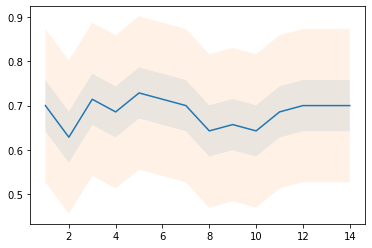

In [971]:
#lets find the best value for k and accuracy

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train.ravel())
    mean_acc[n-1] = metrics.accuracy_score(y_test, knn.predict(X_test))
    std_acc[n-1] = np.std(knn_result==y_test)/np.sqrt(knn_result.shape[0])

print(mean_acc)

plt.plot(range(1,Ks), mean_acc)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10)

plt.show()

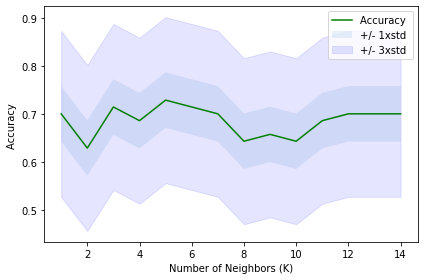

The best accuracy was  0.7285714285714285 with k= 5


In [972]:
#Plotting the model accuracy for the different number of neighbors.

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was ", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [973]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train.ravel())
#predicitng (with k being 5)
knn_result = neigh.predict(X_test)
knn_result[0:5]
#y[0:5]

array([1, 1, 1, 1, 1])

In [974]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, knn_result))

Train set Accuracy:  0.8442028985507246
Test set Accuracy:  0.7285714285714285


### The best accuracy was  0.7285714285714285 with value of k = 5 (using the'loan_train.csv')

### We will evaluate the models using loan_test.csv at the end 

# Decision Tree

In [975]:
from sklearn.tree import DecisionTreeClassifier

In [976]:
#model
drugTree = DecisionTreeClassifier(criterion="entropy")
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [977]:
#prediction
tree_result = drugTree.predict(X_test)
print(tree_result[0:5])
print(y_test[0:5])

[1 1 1 1 1]
[[1]
 [1]
 [1]
 [1]
 [1]]


In [978]:
metrics.accuracy_score(y_test, tree_result)

0.7142857142857143

### Accuracy score is 0.7 using the using the'loan_train.csv'

# Support Vector Machine

#### using kernel = rbf

In [979]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, f1_score
clf = svm.SVC(kernel='rbf', random_state = 4)
clf.fit(X_train, y_train.ravel()) 


SVC(random_state=4)

In [980]:
#predict

svm_predict = clf.predict(X_test)
print(svm_predict[0:5])
print(y_test[0:5])

[0 1 1 1 1]
[[1]
 [1]
 [1]
 [1]
 [1]]


In [981]:
svm_result = metrics.accuracy_score(y_test,svm_predict)
svm_result

0.7714285714285715

#### using kernel = linear

In [982]:
clf = svm.SVC(kernel='linear', random_state = 4)
clf.fit(X_train, y_train.ravel()) 

#predict
svm_predict = clf.predict(X_test)
print(svm_predict[0:5])
print(y_test[0:5])

svm_result = metrics.accuracy_score(y_test,svm_predict)
svm_result

[1 1 1 1 1]
[[1]
 [1]
 [1]
 [1]
 [1]]


0.7857142857142857

#### using kernel = poly

In [983]:
clf = svm.SVC(kernel='poly', random_state = 4)
clf.fit(X_train, y_train.ravel()) 

#predict
svm_predict = clf.predict(X_test)
print(svm_predict[0:5])
print(y_test[0:5])

svm_result = metrics.accuracy_score(y_test,svm_predict)
svm_result

[1 1 1 1 1]
[[1]
 [1]
 [1]
 [1]
 [1]]


0.7857142857142857

#### using kernel = sigmoid

In [984]:
clf = svm.SVC(kernel='sigmoid', random_state = 4)
clf.fit(X_train, y_train.ravel()) 

#predict
svm_predict = clf.predict(X_test)
print(svm_predict[0:5])
print(y_test[0:5])

svm_result = metrics.accuracy_score(y_test,svm_predict)
svm_result

[1 1 1 1 1]
[[1]
 [1]
 [1]
 [1]
 [1]]


0.7714285714285715

### SVM model with kernel = linear and poly have highest accuracy level

# Logistic Regression

In [985]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train.ravel())
lr_predict = lr.predict(X_test)
print(lr_predict[0:5])
print(y_test[0:5])


[0 1 1 1 1]
[[1]
 [1]
 [1]
 [1]
 [1]]


In [986]:
lr_result = metrics.accuracy_score(y_test,lr_predict)
lr_result

0.6571428571428571

In [987]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
cnf_matrix = confusion_matrix(y_test, lr_predict)
f1_lr = f1_score(y_test, lr_predict, average='weighted')
cnf_matrix, f1_lr

(array([[ 4, 11],
        [13, 42]]),
 0.6646825396825397)

#### using solver = saga

In [988]:
lr = LogisticRegression(C=0.01, solver='saga').fit(X_train, y_train.ravel())
lr_predict = lr.predict(X_test)
print(lr_predict[0:5])
print(y_test[0:5])


[1 1 1 1 1]
[[1]
 [1]
 [1]
 [1]
 [1]]


In [989]:
lr_result = metrics.accuracy_score(y_test,lr_predict)
lr_result

0.7857142857142857

In [990]:
cnf_matrix = confusion_matrix(y_test, lr_predict)
f1_lr = f1_score(y_test, lr_predict, average='weighted')
cnf_matrix, f1_lr

(array([[ 0, 15],
        [ 0, 55]]),
 0.6914285714285714)

# Model Evaluation using Test set

In [991]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [992]:
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [993]:
test_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)
test_df['day_ofweek_applied'] = test_df['effective_date'].dt.dayofweek
test_df['day_ofweek_due'] = test_df['due_date'].dt.dayofweek
test_df['applied_weekend'] = test_df['day_ofweek_applied'].apply(lambda x :1 if (x > 3) else 0)
test_df['due_on_0_6_day'] = test_df['day_ofweek_due'].apply(lambda x:1 if (x == 0 or x == 6) else 0)

test_df['Gender'].replace(to_replace = ['male','female'], value = [0,1], inplace = True)

edu_dummy = pd.get_dummies(test_df.education)
feature_test = pd.concat([test_df,edu_dummy], axis =1)


test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_ofweek_applied,day_ofweek_due,applied_weekend,due_on_0_6_day
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,4,0,0
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,3,1,0
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,6,1,1
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,6,1,1
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,6,1,1


In [994]:
test_df.drop(['effective_date', 'due_date'], axis =1 , inplace = True)
target_test = test_df[['loan_status']]
test_df.head(), target_test.head()

(  loan_status  Principal  terms  age             education  Gender  \
 0     PAIDOFF       1000     30   50              Bechalor       1   
 1     PAIDOFF        300      7   35       Master or Above       0   
 2     PAIDOFF       1000     30   43  High School or Below       1   
 3     PAIDOFF       1000     30   26               college       0   
 4     PAIDOFF        800     15   29              Bechalor       0   
 
    day_ofweek_applied  day_ofweek_due  applied_weekend  due_on_0_6_day  
 0                   3               4                0               0  
 1                   4               3                1               0  
 2                   5               6                1               1  
 3                   5               6                1               1  
 4                   6               6                1               1  ,
   loan_status
 0     PAIDOFF
 1     PAIDOFF
 2     PAIDOFF
 3     PAIDOFF
 4     PAIDOFF)

In [995]:
feature_test.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_ofweek_applied,day_ofweek_due,applied_weekend,due_on_0_6_day,Bechalor,High School or Below,Master or Above,college
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,4,0,0,1,0,0,0
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,3,1,0,0,0,1,0
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,6,1,1,0,1,0,0
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,6,1,1,0,0,0,1
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,6,1,1,1,0,0,0


In [996]:
Feature.head()

,Principal,terms,age,Gender,applied_weekend,due_on_0_6_day,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,0,1,0,0
1,1000,30,33,1,0,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,0,1
4,1000,30,29,0,1,0,0,0,0,1


In [997]:
X_test = feature_test[['Principal','terms','age','Gender','applied_weekend','due_on_0_6_day','Bechalor','High School or Below','Master or Above','college']]
X_test.head()

,Principal,terms,age,Gender,applied_weekend,due_on_0_6_day,Bechalor,High School or Below,Master or Above,college
0,1000,30,50,1,0,0,1,0,0,0
1,300,7,35,0,1,0,0,0,1,0
2,1000,30,43,1,1,1,0,1,0,0
3,1000,30,26,0,1,1,0,0,0,1
4,800,15,29,0,1,1,1,0,0,0


In [998]:
target_test['loan_status_01'] = test_df['loan_status'].apply(lambda x:1 if (x == "PAIDOFF") else 0)
y_test = target_test[['loan_status_01']]



In [999]:
X_final = X_test.values
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -1.31316772, -0.38170062,  1.13639374, -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
        -1.31316772,  2.61985426, -0.87997669, -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -1.31316772, -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -1.31316772, -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -1.31316772, -0.38170062, -0.87997669, -0.07624929,  1.14984679]])

In [1000]:
y_final = y_test.values
y[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [1001]:
#Normalize the data
X_final = preprocessing.StandardScaler().fit(X_final).transform(X_final)
X_final[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
        -1.03774904,  2.39791576, -0.79772404, -0.19611614, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -1.03774904, -0.41702883, -0.79772404,  5.09901951, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
         0.96362411, -0.41702883,  1.25356634, -0.19611614, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
         0.96362411, -0.41702883, -0.79772404, -0.19611614,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         0.96362411,  2.39791576, -0.79772404, -0.19611614, -0.86135677]])

# K Nearest Neighbor(KNN) test data evaluation

In [1002]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import metrics

In [1003]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k).fit(X,y.ravel())
y_hat = knn.predict(X_final)
y_hat[0:5]
knn_f1 = f1_score(y_final, y_hat, average='weighted')
knn_jacc = jaccard_score(y_final, y_hat, pos_label=1) #label 1  == "PAIDOFF"
print(f" jaccard_score = {knn_jacc}")
print(f" f1_score = {knn_f1}")     
print("Accuracy: ", metrics.accuracy_score(y_final, y_hat))
print(confusion_matrix(y_final, y_hat))
print(classification_report(y_final, y_hat))

 jaccard_score = 0.7446808510638298
 f1_score = 0.7719407963310403
Accuracy:  0.7777777777777778
[[ 7  7]
 [ 5 35]]
              precision    recall  f1-score   support

           0       0.58      0.50      0.54        14
           1       0.83      0.88      0.85        40

    accuracy                           0.78        54
   macro avg       0.71      0.69      0.70        54
weighted avg       0.77      0.78      0.77        54



# Decision Tree test data evaluation

In [1004]:
drugTree1 = DecisionTreeClassifier(criterion="entropy")
drugTree1.fit(X,y)
#prediction
tree_result1 = drugTree1.predict(X_final)


In [1005]:
accu = metrics.accuracy_score(y_final, tree_result1)
tree_f1 = f1_score(y_final, tree_result1, average='weighted')
tree_jacc = jaccard_score(y_final, tree_result1, pos_label=1) #label 1  == "PAIDOFF"
print(f" jaccard_score = {tree_jacc}")
print(f" f1_score = {tree_f1}")     
print(f" Accuracy = {accu}")
print(confusion_matrix(y_final, tree_result1))
print(classification_report(y_final, tree_result1))

 jaccard_score = 0.6530612244897959
 f1_score = 0.6812985825331505
 Accuracy = 0.6851851851851852
[[ 5  9]
 [ 8 32]]
              precision    recall  f1-score   support

           0       0.38      0.36      0.37        14
           1       0.78      0.80      0.79        40

    accuracy                           0.69        54
   macro avg       0.58      0.58      0.58        54
weighted avg       0.68      0.69      0.68        54



# Support Vector Machine test data evaluation

In [1006]:
clf1 = svm.SVC(kernel='linear', random_state = 4)
clf1.fit(X,y.ravel()) 

#predict
svm_predict1 = clf1.predict(X_final)


In [1007]:

accu2 = metrics.accuracy_score(y_final, svm_predict1)
svm_f1 = f1_score(y_final, svm_predict1, average='weighted')
svm_jacc = jaccard_score(y_final, svm_predict1, pos_label=1) #label 1  == "PAIDOFF"
print(f" jaccard_score = {svm_jacc}")
print(f" f1_score = {svm_f1}")     
print(f" Accuracy = {accu2}")
print(confusion_matrix(y_final, svm_predict1))
print(classification_report(y_final, svm_predict1))

 jaccard_score = 0.7407407407407407
 f1_score = 0.6304176516942475
 Accuracy = 0.7407407407407407
[[ 0 14]
 [ 0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



# Logistic Regression test data evaluation

In [1016]:
lr1 = LogisticRegression(C=0.01, solver='saga').fit(X,y.ravel())
lr_predict1 = lr1.predict(X_final)

#log_loss
y_hat_prob = lr1.predict_proba(X_final)
lr_logloss = log_loss(y_final, y_hat_prob)


In [1017]:
accu3 = metrics.accuracy_score(y_final, lr_predict1)
lr_f1 = f1_score(y_final, lr_predict1, average='weighted')
lr_jacc = jaccard_score(y_final, lr_predict1, pos_label=1) #label 1  == "PAIDOFF"
print(f" jaccard_score = {lr_jacc}")
print(f" f1_score = {lr_f1}")     
print(f" Accuracy = {accu3}")
print(f" Log loss = {lr_logloss}")
print(confusion_matrix(y_final, lr_predict1))
print(classification_report(y_final, lr_predict1))



 jaccard_score = 0.7407407407407407
 f1_score = 0.6304176516942475
 Accuracy = 0.7407407407407407
 Log loss = 0.5169854741326203
[[ 0 14]
 [ 0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



# Report

In [1021]:
headings = ['Algorithm','Jaccard','F1-Score','Logloss']
results1 = [
    ['KNN',knn_jacc,knn_f1,'N/A'],
    ['Decision Tree',tree_jacc,tree_f1,'N/A'],
    ['SVM',svm_jacc,svm_f1,'N/A'],
    ['Logistic Regression',lr_jacc,lr_f1,lr_logloss]
]
res = pd.DataFrame(results1, columns = headings)   
res

,Algorithm,Jaccard,F1-Score,Logloss
0,KNN,0.744681,0.771941,N/A
1,Decision Tree,0.653061,0.681299,N/A
2,SVM,0.740741,0.630418,N/A
3,Logistic Regression,0.740741,0.630418,0.516985
